# Modelado

In [90]:
# importando las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Para dividir los datos
from sklearn.model_selection import train_test_split

# Modelo de regresion 
from sklearn.linear_model import Lasso

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [63]:
# Indicar que la renderizacion de los graficos sea en el notebook
%matplotlib inline

# Establecer eltilo visual de los graficos
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_theme(style='darkgrid')

In [64]:
# Cargar datos
X = pd.read_csv('../data/processed/final_movies_imputados_df.csv')

In [65]:
X.head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,imdb_score
0,425000000.0,2.783919e+09,2009.000000,1.780000,178.00000,4834.0,7.9
1,306000000.0,2.058662e+09,2002.104559,2.126541,108.55095,143.0,7.1
2,300000000.0,9.634204e+08,2007.000000,2.350000,169.00000,48350.0,7.1
3,300000000.0,8.796209e+08,2015.000000,2.350000,148.00000,11700.0,6.8
4,275000000.0,1.084439e+09,2012.000000,2.350000,164.00000,106759.0,8.5


In [66]:
y = X['worldwide_gross']
X.drop('worldwide_gross', axis=1, inplace=True)

## Division de los datos

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Implementacion de un modelo de regresion 
Usare Regresion Lasso

In [68]:
model = Lasso()

In [69]:
model.fit(X_train, y_train)

/Volumes/External/Mac Users/dln/Proyectos/ML_aplicado_recordando/venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.091e+18, tolerance: 8.228e+15
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [70]:
predicted = model.predict(X_test)
predicted.shape

(1219,)

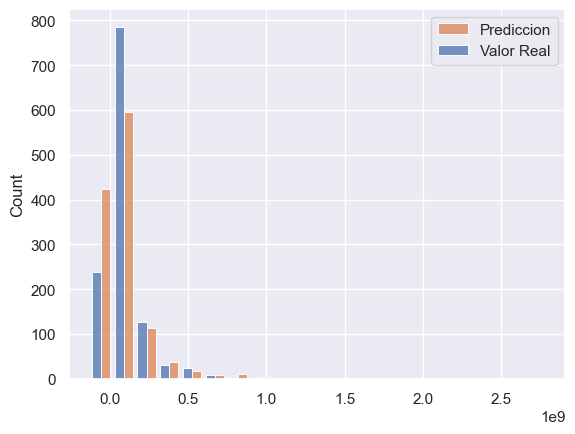

In [71]:
sns.histplot([predicted, y_test], bins=20, multiple='dodge', shrink=.8,)
plt.legend(labels=['Prediccion', 'Valor Real'], frameon=True);
#plt.ylim(0, 200)


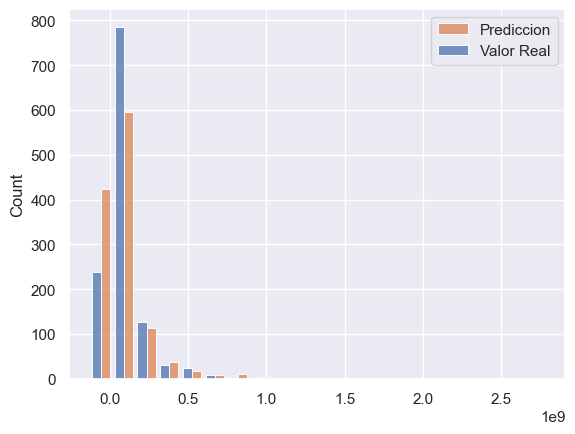

In [72]:
sns.histplot([predicted, y_test], bins=20, multiple='dodge', shrink=.8,)
plt.legend(labels=['Prediccion', 'Valor Real'], frameon=True)

## Evaluando el modelo

In [73]:
# Esto nos retorna el R2 Score
model.score(X_test, y_test)

0.5688947056162903

In [74]:
residuales = y_test - predicted

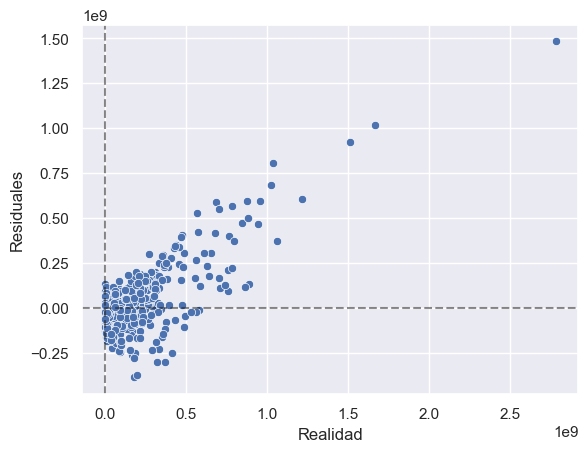

In [75]:
sns.scatterplot(x=y_test, y=residuales)
plt.axhline(y=0, c='k', ls='--', alpha=0.5)
plt.axvline(x=0, c='k', ls='--', alpha=0.5)
plt.xlabel('Realidad')
plt.ylabel('Residuales');

In [76]:
### Ahora fijemosnos no en la cantidad, sino en el porcentaje de error 
# Volores Absolutos (positivos)
ap_residuales = np.abs(residuales) / y_test

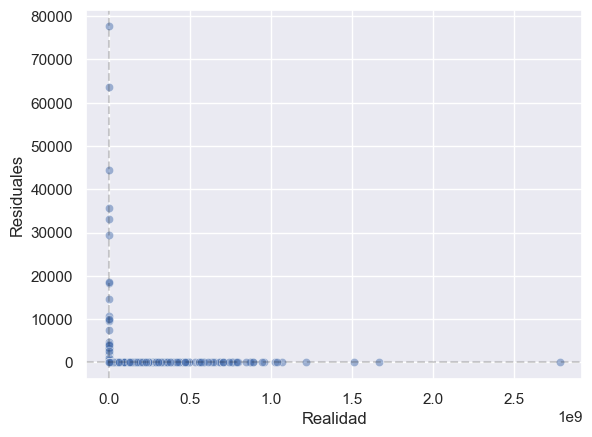

In [77]:
# Graficamos los residuales porcentuales
sns.scatterplot(x=y_test, y=ap_residuales, alpha=0.5)
plt.axhline(y=0, c='k', ls='--', alpha=0.2)
plt.axvline(x=0, c='k', ls='--', alpha=0.2)
plt.xlabel('Realidad')
plt.ylabel('Residuales');

In [78]:
## Reducir la escala para apreciar mejor los datos lejanos
# Pasandolo a escala logaritmica
lap_residuales = np.log(ap_residuales)

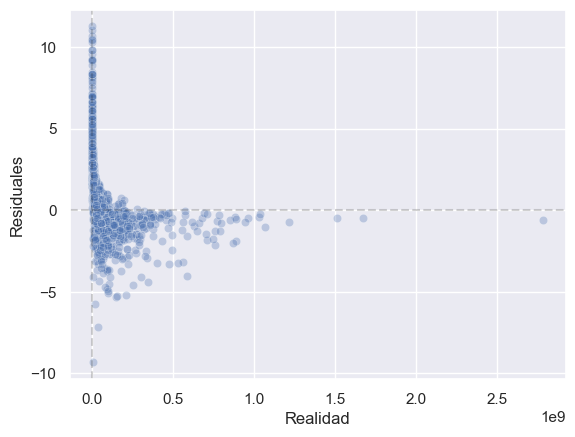

In [79]:
sns.scatterplot(x=y_test, y=lap_residuales, alpha=0.3)
plt.axhline(y=0, c='k', ls='--', alpha=0.2)
plt.axvline(x=0, c='k', ls='--', alpha=0.2)
plt.xlabel('Realidad')
plt.ylabel('Residuales');

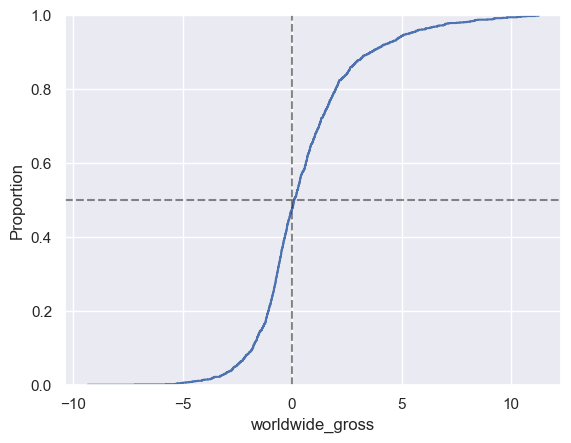

In [80]:
# Funbcion Cumulativa de la distribucion de los errores
# sns.histplot(lap_residuales, bins=100, cumulative=True, element='step', stat='density', fill=False)
sns.ecdfplot(lap_residuales)
plt.axvline(x=0, c='k', ls='--', alpha=0.5)
plt.axhline(y=0.5, c='k', ls='--', alpha=0.5)

No esta mal para un primer acercamiento.
Tenemos a poco mas de la mitad de los datos haciendo buenas predicciones.

Ahora la tarea es mejorar esa presicion.

### Seleccionando Features

In [81]:
model.coef_

array([ 2.97839464e+00, -6.61240183e+04, -5.58297835e+06, -4.13943170e+04,
        1.57553276e+02,  2.87284061e+07])

In [82]:
var = np.floor(np.log10(np.abs(model.coef_)))

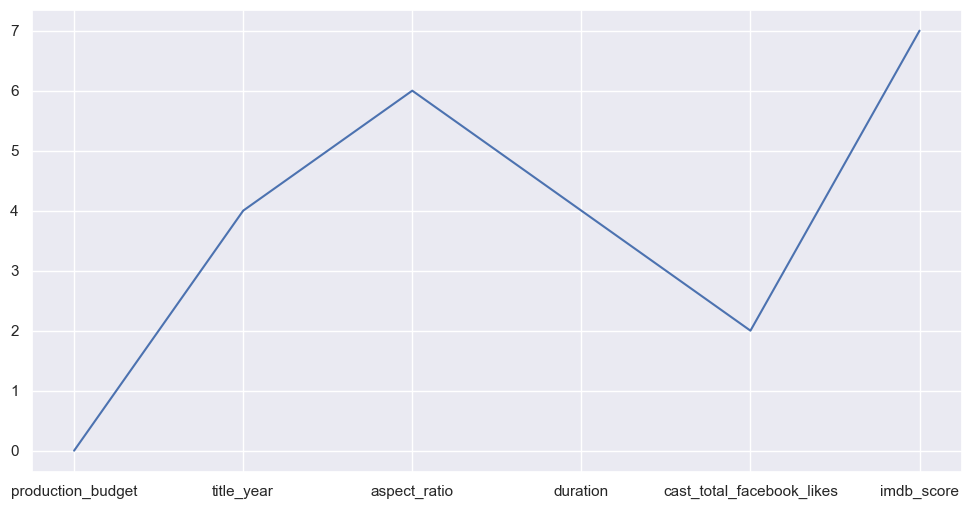

In [83]:
plt.figure(figsize=(12,6))
sns.lineplot(var)
plt.xticks(np.arange(6), list(X.columns));

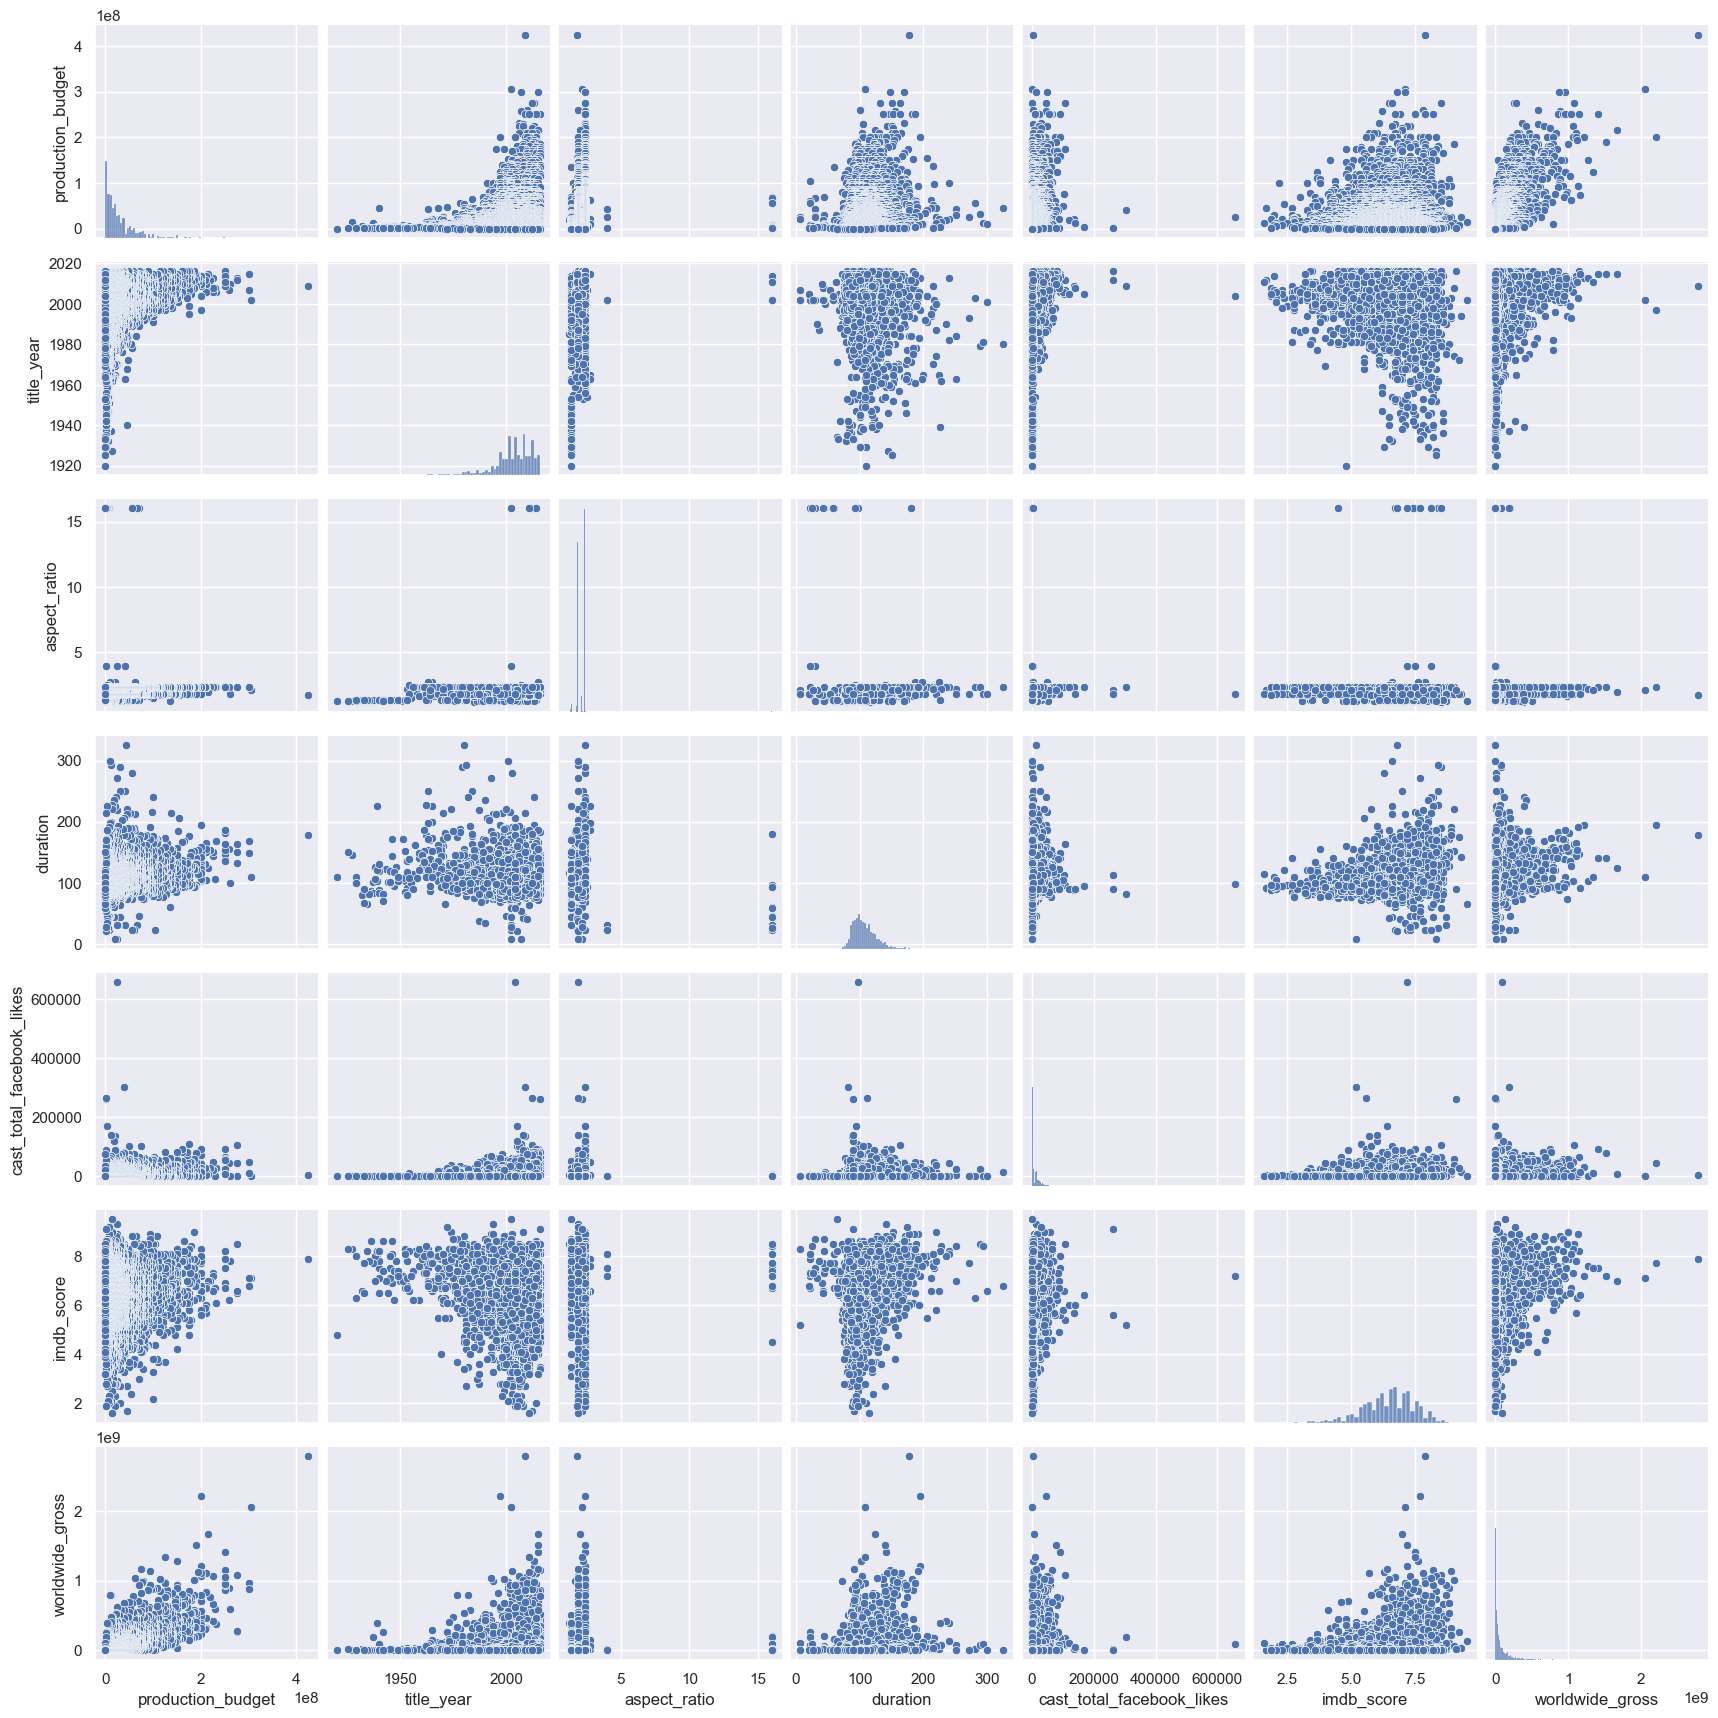

In [84]:
sns.pairplot( pd.concat([X, y], axis=1) )

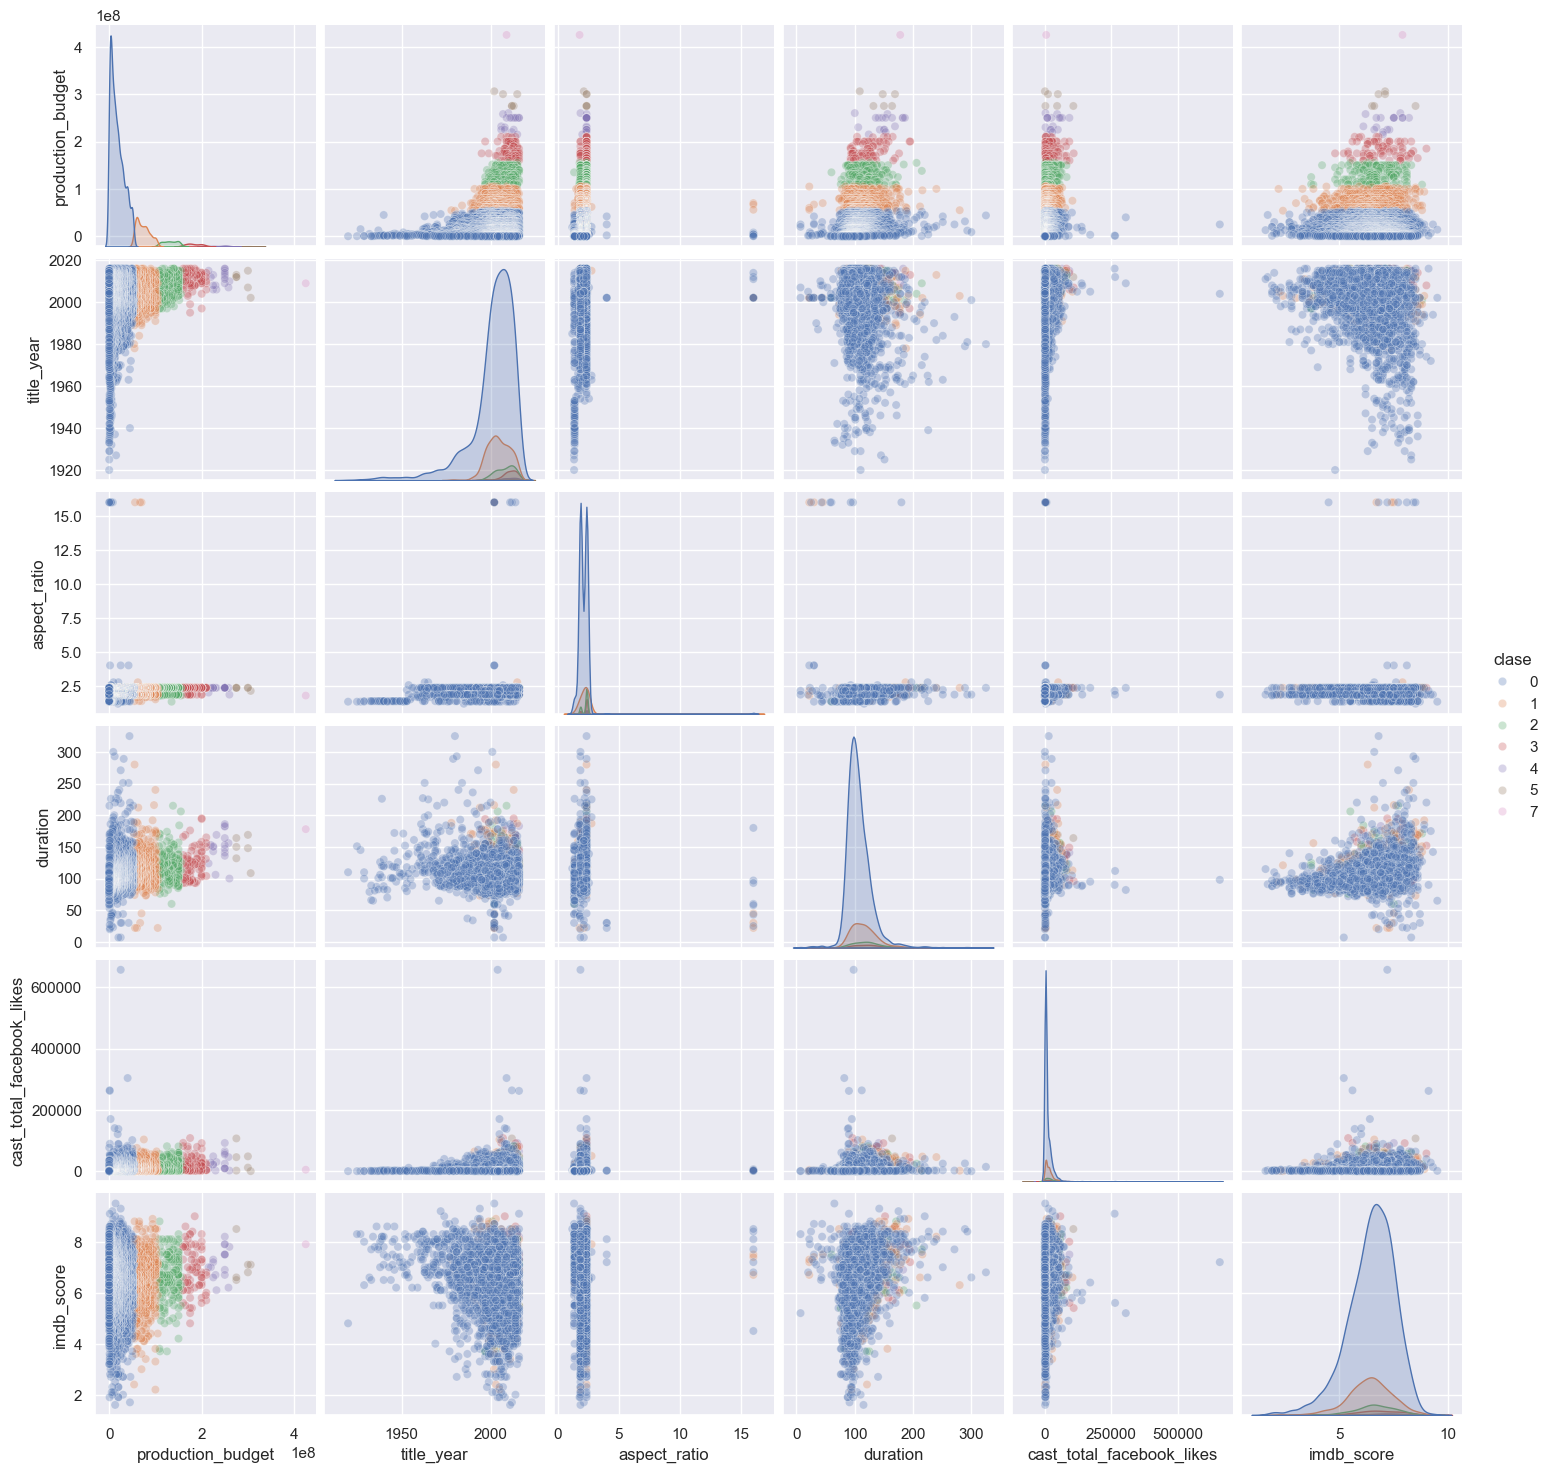

In [85]:
clases = pd.cut(X['production_budget'], bins=8).cat.codes.rename('clase')
aux = pd.concat([X, clases], axis=1)
sns.pairplot(aux, hue='clase', palette='deep', plot_kws=dict(alpha=0.3))

In [86]:
pd.concat([X, clases], axis=1)

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,imdb_score,clase
0,425000000.0,2009.000000,1.780000,178.00000,4834.0,7.9,7
1,306000000.0,2002.104559,2.126541,108.55095,143.0,7.1,5
2,300000000.0,2007.000000,2.350000,169.00000,48350.0,7.1,5
3,300000000.0,2015.000000,2.350000,148.00000,11700.0,6.8,5
4,275000000.0,2012.000000,2.350000,164.00000,106759.0,8.5,5
...,...,...,...,...,...,...,...
4058,7000.0,2004.000000,1.850000,77.00000,368.0,7.0,0
4059,7000.0,2005.000000,2.126541,80.00000,0.0,6.3,0
4060,7000.0,2005.000000,2.126541,84.00000,93.0,7.8,0
4061,3967.0,2012.000000,2.350000,100.00000,2386.0,6.3,0


<Axes: >

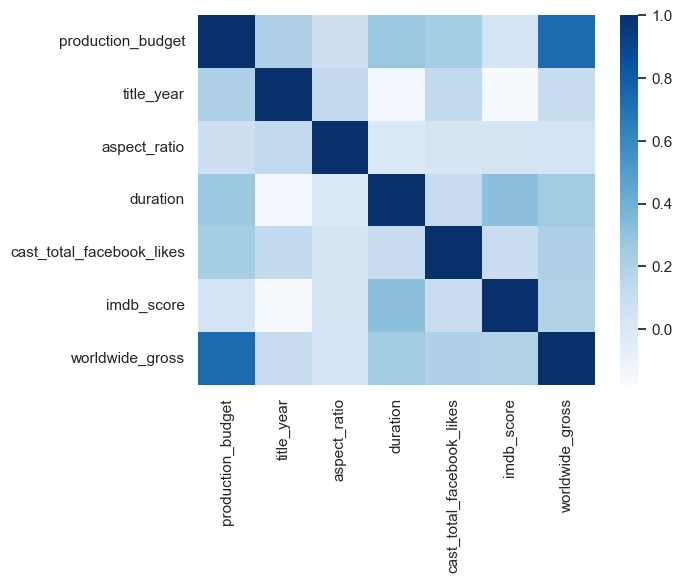

In [87]:
sns.heatmap( (pd.concat([X,y], axis=1).corr()), cmap='Blues' )